建立2个逻辑回归，L1,L2正则化的差别对比：

In [3]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
data = load_breast_cancer()
x = data.data
y = data.target
data.data.shape

(569, 30)

In [6]:
#实例化
lrL1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrL2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
# 逻辑回归的重要属性coef_,查看每个参数对应的参数
lrL1 = lrL1.fit(x,y)
lrL1.coef_ #很多为0

array([[ 3.98340762,  0.03127131, -0.13500608, -0.01617164,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50253272,  0.        , -0.07122618,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24505083, -0.12811386, -0.01445049,  0.        ,
         0.        , -2.05964792,  0.        ,  0.        ,  0.        ]])

In [7]:
lrL1.coef_ != 0

array([[ True,  True,  True,  True, False, False, False, False, False,
        False, False,  True, False,  True, False, False, False, False,
        False, False, False,  True,  True,  True, False, False,  True,
        False, False, False]])

In [8]:
(lrL1.coef_ != 0).sum(axis=1)#实现了降维

array([10])

In [9]:
lrL2 = lrL2.fit(x,y)
lrL2.coef_  #都不会为0

array([[ 1.61542371e+00,  1.02248246e-01,  4.76325278e-02,
        -4.41770420e-03, -9.40455763e-02, -3.01374496e-01,
        -4.55801506e-01, -2.22065119e-01, -1.35379264e-01,
        -1.93837969e-02,  1.64802418e-02,  8.83843487e-01,
         1.21607733e-01, -9.48332435e-02, -9.79370778e-03,
        -2.39515093e-02, -5.73477868e-02, -2.69925141e-02,
        -2.77193181e-02,  1.62862353e-04,  1.26656807e+00,
        -3.01747441e-01, -1.73000457e-01, -2.21944066e-02,
        -1.72994079e-01, -8.79114209e-01, -1.16291700e+00,
        -4.27104639e-01, -4.19741038e-01, -8.69725697e-02]])

哪个正则化的效果好？

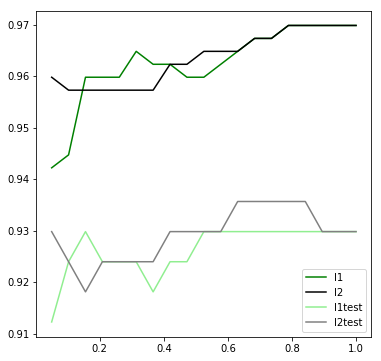

In [10]:
l1 = []
l2 = []
l1test = []
l2test = []
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)
#画C的学习曲线
for i in np.linspace(0.05,1,19):
    lrL1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrL2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrL1.fit(x_train,y_train)
    # accuracy_score(lrL1.predict(x_train),y_train)等价于lrL1.score(x_train,y_train)
    l1.append(accuracy_score(lrL1.predict(x_train),y_train))
    l1test.append(accuracy_score(lrL1.predict(x_test),y_test))
    
    lrL2.fit(x_train,y_train)
    l2.append(accuracy_score(lrL2.predict(x_train),y_train))
    l2test.append(accuracy_score(lrL2.predict(x_test),y_test))

graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["l1","l2","l1test","l2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])

plt.legend(loc=4)  # 放在右下角 ，光标放在函数旁边，按shift+tab可以出现对函数的解释
plt.show()

# 3.用逻辑回归制作评分卡
## 3.1 导库，获取数据，探索数据


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [4]:
data = pd.read_csv("E:/ivy_machine_learning/program/莫烦学习/2019年寒假学习+sklearn+jupyter用法/菜菜sklearn完整版/rankingcard.csv",index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.shape

(150000, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


## 3.2 预处理
### 3.2.1 去重处理

In [7]:
# 去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


删除后，索引并没有改变，我们需要更改索引

In [9]:
data.shape[0]

149391

In [10]:
# 做了重复值删除后，必须恢复索引
data.index = range(data.shape[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 3.2.2 填补缺失值

In [13]:
# 探索缺失值
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [14]:
# 探索缺失值d的比例，如果比较大，则不能直接删除
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

发现收入项不能删除，但是家庭成员可以忽略

上面代码的另一种表达

In [15]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [16]:
# 先来填补家庭成员这样的缺失值,用均值填补
data["NumberOfDependents"].fillna(data["NumberOfDependents"].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [20]:
# data["NumberOfDependents"] == data.loc[:,"NumberOfDependents"]  
# 上面等价

In [21]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

用随机森林回归来填补缺失值

In [31]:
def fill_missing_rf(x,y,to_fill):
    """
    使用随机森林来填补一列特征的缺失值
    
    参数：
    x:要填补的特征矩阵
    y:完整的，没有缺失值的标签
    to_fill:字符串，需要填补的那一列的名称
    """
    # 构建新的特征矩阵和新标签
    df = x.copy()
    fill = df[to_fill]  # 新标签
    df = pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)#新特征矩阵
    
    #找出训练集和测试集
    y_train = fill[fill.notnull()]
    y_test = fill[fill.isnull()]
    x_train = df.iloc[y_train.index,:]
    x_test = df.iloc[y_test.index,:]
    
    #用随机森林回归填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(x_train,y_train)
    y_pre = rfr.predict(x_test)
    
    return y_pre    

In [32]:
x = data.iloc[:,1:]
y = data.iloc[:,0]
x.shape

(149391, 10)

In [33]:
y_pred = fill_missing_rf(x,y,"MonthlyIncome")

In [35]:
y_pred.shape

(29221,)

下面，我们就要取出data中缺失的值，将y_pred赋值给它

In [38]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"].shape

(29221,)

In [39]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"]=y_pred

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 3.2.3 描述性统计处理异常值

In [41]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.493910e+05,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,5.427452e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.321931e+04,5.136515,3.826165,1.130196,3.810523,1.101749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,4.427673e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,7.416000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [42]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.452270,13219.309712,0.0,0.0,0.190000,1800.000000,4427.673000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [44]:
(data["age"]==0).sum()

1

In [51]:
data = data[data["age"]!=0]

In [47]:
(data["NumberOfTime30-59DaysPastDueNotWorse"]>90).sum()

225

In [49]:
data[data["NumberOfTime30-59DaysPastDueNotWorse"]>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [50]:
data[data["NumberOfTime30-59DaysPastDueNotWorse"]>90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.000000,2700.000000,0,98,0,98,0.000000
2285,0,1.0,22,98,0.000000,1426.883109,0,98,0,98,0.000000
3883,0,1.0,38,98,12.000000,2387.580000,0,98,0,98,0.000000
4416,0,1.0,21,98,0.000000,0.000000,0,98,0,98,0.000000
4704,0,1.0,21,98,0.000000,2000.000000,0,98,0,98,0.000000
5072,0,1.0,33,98,0.000000,1500.000000,0,98,0,98,0.000000
6279,1,1.0,51,98,0.000000,7500.000000,0,98,0,98,0.000000
7031,1,1.0,29,98,0.000000,1647.000000,0,98,0,98,0.000000
7116,1,1.0,25,98,21.000000,4860.590000,0,98,0,98,0.759863
7686,1,1.0,21,98,0.000000,2070.940171,0,98,0,98,0.000000


In [52]:
data = data[data["NumberOfTime30-59DaysPastDueNotWorse"]<90]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149165 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


恢复索引

In [55]:
data.index = range(data.shape[0])

In [59]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,0.97502,1.094061,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.00000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,1277.30000,4989.360000,329664.0
MonthlyIncome,149165.0,5431.795997,13228.523250,0.0,0.0,0.190000,1800.000000,4440.000000,7422.000000,10800.00000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.00000,24.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,11.0


### 3.2.5 数据不均衡问题

In [76]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [77]:
set(y)

{0, 1}

In [78]:
# 对Serious做统计学分析，用.value_counts()
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

我们做个比较容易看的表达

In [80]:
n_samples = x.shape[0]

n_1_samples = y.value_counts()[1]
n_0_samples = y.value_counts()[0]

print("样本个数：{}；标签1占{:.2%};标签0占{:.2%}".format(n_samples,n_1_samples/n_samples,n_0_samples/n_samples))

样本个数：149165；标签1占6.62%;标签0占93.38%


In [81]:
# 专门用来处理数据不均衡问题
import imblearn

In [84]:
from imblearn.over_sampling import SMOTE

In [86]:
sm = SMOTE(random_state=42) #实例化
x,y = sm.fit_sample(x,y)

In [88]:
n_samples_ = x.shape[0] 
n_samples_

278584

In [89]:
x.shape

(278584, 10)

In [90]:
y.shape

(278584,)

In [91]:
pd.Series(y).value_counts()

1    139292
0    139292
dtype: int64

In [93]:
# n_samples = x.shape[0]

n_1_samples = pd.Series(y).value_counts()[1]
n_0_samples = pd.Series(y).value_counts()[0]

print("样本个数：{}；标签1占{:.2%};标签0占{:.2%}".format(n_samples_,n_1_samples/n_samples_,n_0_samples/n_samples_))

样本个数：278584；标签1占50.00%;标签0占50.00%


### 3.2.6 分训练集和测试集

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

x_train,x_vali,y_train,y_vali = train_test_split(x,y,test_size=0.3,random_state=42)

In [97]:
model_data = pd.concat([y_train,x_train],axis=1)
model_data.head()

,0,0,1,2,3,4,5,6,7,8,9
228626,1,0.999845,38.092389,0.000000,0.202286,3919.876814,7.030796,0.969204,0.000000,0.969204,0.969204
77755,0,0.067156,59.000000,0.000000,0.377116,9744.000000,25.000000,0.000000,2.000000,0.000000,0.000000
141145,0,0.030254,51.000000,0.000000,0.615891,3800.000000,16.000000,0.000000,2.000000,0.000000,0.000000
171258,1,0.469502,64.721237,0.420077,4487.780696,0.021004,12.260232,0.000000,1.579923,0.000000,0.000000
126241,0,0.025159,40.000000,0.000000,0.178416,13333.000000,6.000000,0.000000,1.000000,0.000000,0.000000


这里的索引是有问题的，我们要修改索引

In [98]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [99]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.999845,38.092389,0.000000,0.202286,3919.876814,7.030796,0.969204,0.000000,0.969204,0.969204
1,0,0.067156,59.000000,0.000000,0.377116,9744.000000,25.000000,0.000000,2.000000,0.000000,0.000000
2,0,0.030254,51.000000,0.000000,0.615891,3800.000000,16.000000,0.000000,2.000000,0.000000,0.000000
3,1,0.469502,64.721237,0.420077,4487.780696,0.021004,12.260232,0.000000,1.579923,0.000000,0.000000
4,0,0.025159,40.000000,0.000000,0.178416,13333.000000,6.000000,0.000000,1.000000,0.000000,0.000000


对验证集做同样的操作

In [101]:
vali_data = pd.concat([y_vali,x_vali],axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [102]:
vali_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.130231,44.776033,0.918402,0.288053,6042.184022,5.489587,0.00000,1.918402,0.918402,0.000000
1,1,0.097978,40.754255,0.459042,0.418327,7200.000000,10.704788,0.00000,1.000000,0.000000,2.000000
2,1,0.696018,33.000000,0.000000,0.259288,5000.000000,9.435607,0.00000,0.000000,0.000000,0.000000
3,1,0.975028,51.000000,0.905790,0.772999,3800.000000,4.188421,0.90579,0.905790,0.000000,1.188421
4,0,0.109052,42.000000,0.000000,1.235082,3334.000000,14.000000,0.00000,2.000000,0.000000,2.000000


In [103]:
model_data.to_csv("E:/ivy_machine_learning/program/莫烦学习/2019年寒假学习+sklearn+jupyter用法/菜菜sklearn完整版/model_data.csv")
vali_data.to_csv("E:/ivy_machine_learning/program/莫烦学习/2019年寒假学习+sklearn+jupyter用法/菜菜sklearn完整版/vali_data.csv")

In [110]:
# 错误
# import os
# # os.mkdir("E:/ivy_machine_learning/program/莫烦学习/2019年寒假学习+sklearn+jupyter用法/菜菜sklearn完整版/model_data222.csv")
# with open("E:/ivy_machine_learning/program/莫烦学习/2019年寒假学习+sklearn+jupyter用法/菜菜sklearn完整版/model_data222.csv",'wb') as f:
#     f.write(str(model_data))

## 3.3 分箱
### 3.3.1等频分箱

In [111]:
model_data['qcut'],updown = pd.qcut(model_data["age"],retbins=True,q=20)

In [112]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,1,0.999845,38.092389,0.000000,0.202286,3919.876814,7.030796,0.969204,0.000000,0.969204,0.969204,"(36.714, 39.0]"
1,0,0.067156,59.000000,0.000000,0.377116,9744.000000,25.000000,0.000000,2.000000,0.000000,0.000000,"(58.814, 61.0]"
2,0,0.030254,51.000000,0.000000,0.615891,3800.000000,16.000000,0.000000,2.000000,0.000000,0.000000,"(50.106, 52.0]"
3,1,0.469502,64.721237,0.420077,4487.780696,0.021004,12.260232,0.000000,1.579923,0.000000,0.000000,"(64.0, 68.0]"
4,0,0.025159,40.000000,0.000000,0.178416,13333.000000,6.000000,0.000000,1.000000,0.000000,0.000000,"(39.0, 41.0]"


In [115]:
model_data['qcut']

0           (36.714, 39.0]
1           (58.814, 61.0]
2           (50.106, 52.0]
3             (64.0, 68.0]
4             (39.0, 41.0]
5           (36.714, 39.0]
6             (45.0, 47.0]
7           (34.0, 36.714]
8             (41.0, 43.0]
9             (61.0, 64.0]
10          (58.814, 61.0]
11            (43.0, 45.0]
12            (54.0, 56.0]
13            (45.0, 47.0]
14        (48.587, 50.106]
15           (74.0, 109.0]
16          (34.0, 36.714]
17            (45.0, 47.0]
18            (43.0, 45.0]
19            (43.0, 45.0]
20          (47.0, 48.587]
21          (36.714, 39.0]
22          (50.106, 52.0]
23            (61.0, 64.0]
24        (48.587, 50.106]
25            (68.0, 74.0]
26          (56.0, 58.814]
27          (31.059, 34.0]
28            (61.0, 64.0]
29          (20.999, 28.0]
                ...       
194978      (56.0, 58.814]
194979      (36.714, 39.0]
194980        (52.0, 54.0]
194981      (28.0, 31.059]
194982        (52.0, 54.0]
194983      (28.0, 31.059]
1

In [117]:
updown.shape

(21,)

In [120]:
model_data[model_data["SeriousDlqin2yrs"]==0].groupby(by='qcut').count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(20.999, 28.0]",4226,4226,4226,4226,4226,4226,4226,4226,4226,4226,4226
"(28.0, 31.059]",3558,3558,3558,3558,3558,3558,3558,3558,3558,3558,3558
"(31.059, 34.0]",4056,4056,4056,4056,4056,4056,4056,4056,4056,4056,4056
"(34.0, 36.714]",2824,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824
"(36.714, 39.0]",5126,5126,5126,5126,5126,5126,5126,5126,5126,5126,5126
"(39.0, 41.0]",3935,3935,3935,3935,3935,3935,3935,3935,3935,3935,3935
"(41.0, 43.0]",4044,4044,4044,4044,4044,4044,4044,4044,4044,4044,4044
"(43.0, 45.0]",4407,4407,4407,4407,4407,4407,4407,4407,4407,4407,4407
"(45.0, 47.0]",4757,4757,4757,4757,4757,4757,4757,4757,4757,4757,4757


In [121]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [122]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4226, 6009),
 (28.0, 31.058839870434152, 3558, 5708),
 (31.058839870434152, 34.0, 4056, 6575),
 (34.0, 36.714138437535155, 2824, 6046),
 (36.714138437535155, 39.0, 5126, 5786),
 (39.0, 41.0, 3935, 5548),
 (41.0, 43.0, 4044, 5671),
 (43.0, 45.0, 4407, 5681),
 (45.0, 47.0, 4757, 6365),
 (47.0, 48.586622912161445, 2487, 4695),
 (48.586622912161445, 50.105994549320855, 4933, 4817),
 (50.105994549320855, 52.0, 4732, 5673),
 (52.0, 54.0, 4697, 5439),
 (54.0, 56.0, 4660, 4483),
 (56.0, 58.81355285670862, 4480, 4838),
 (58.81355285670862, 61.0, 6777, 3824),
 (61.0, 64.0, 7005, 3780),
 (64.0, 68.0, 6644, 2655),
 (68.0, 74.0, 6766, 2000),
 (74.0, 109.0, 7754, 1547)]

In [124]:
import scikitplot as skplt

d:\python\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
